In [8]:
import pandas as pd
data = pd.read_csv("events.csv")
data.shape
data.info()

#as it can be seen that size of all columns is not same 
#means there are some missing or some extra values to other categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370251 entries, 0 to 370250
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        370251 non-null  object 
 1   latitude    370251 non-null  float64
 2   longitude   370251 non-null  float64
 3   event-type  370251 non-null  object 
 4   city        370247 non-null  object 
 5   county      369713 non-null  object 
 6   state       370251 non-null  object 
dtypes: float64(2), object(5)
memory usage: 19.8+ MB


In [12]:
data.state.describe()
data.isnull().sum()

date            0
latitude        0
longitude       0
event-type      0
city            4
county        538
state           0
dtype: int64

In [18]:
data.dropna(subset=["county"],inplace=True)

In [20]:
data.isnull().sum()

date          0
latitude      0
longitude     0
event-type    0
city          4
county        0
state         0
dtype: int64

In [24]:
data.dropna(subset=["city"],inplace=True)
data.isnull().sum()
#as can be seen there are no null values

date          0
latitude      0
longitude     0
event-type    0
city          0
county        0
state         0
dtype: int64

In [30]:
#now comes univariate analysis
import matplotlib.pyplot as plt
data.state.value_counts(normalize=True)
data.county.value_counts(normalize=True)
#data.state.value_counts(normalize=True).plot.pie()
#plt.show()

WASHINGTON                  0.009245
JEFFERSON                   0.009083
DOUGLAS                     0.008382
JACKSON                     0.007806
MONTGOMERY                  0.007482
                              ...   
Butler                      0.000003
Greenwood                   0.000003
NORTHERN OREGON CASCADES    0.000003
Smyth                       0.000003
NORTHERN HOUGHTON           0.000003
Name: county, Length: 2399, dtype: float64

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


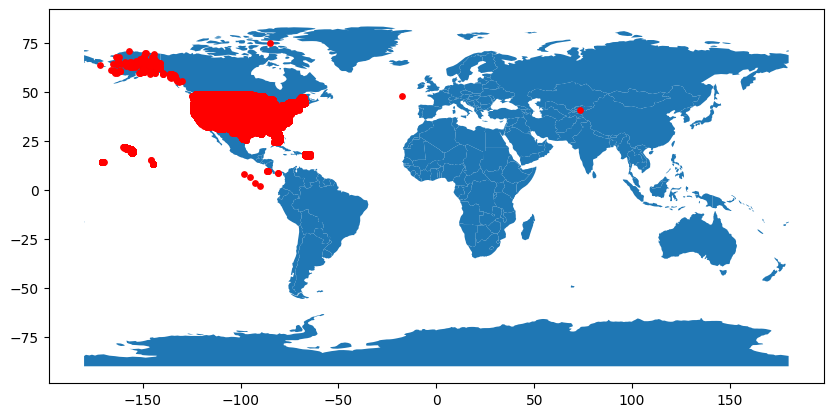

In [39]:
#univariate analysis 
#scatter plot
#it is for data cleaning 
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
print(geometry)
gdf = GeoDataFrame(data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);